In [117]:
from ema_workbench import load_results

In [118]:
import numpy.lib.recfunctions as rcf

results = load_results('./results/pff 6 floods 1000 experiments cleaned.tar.gz')
experiments, outcomes = results

# calculate performance relative to non flooded
logical = experiments['Flood_area']=='NON_FLOODED'
outcomes_non_flooded = {k:v[logical] for k,v in outcomes.items()}

delta_outcomes = outcomes.copy()
delta_outcomes = {k:v[logical==False] for k,v in outcomes.items()}
delta_experiments = experiments[logical==False]

print(delta_outcomes['Garment_TransportCost'][0:10])
for entry in set(delta_experiments['Flood_area']):
    logical = delta_experiments['Flood_area']==entry
    
    for key in delta_outcomes.keys():
        delta_outcomes[key][logical] /= outcomes_non_flooded[key]
print(delta_outcomes['Garment_TransportCost'][0:10])

experiments = delta_experiments
outcomes = delta_outcomes
results = (experiments, outcomes)

[MainProcess/INFO] results loaded succesfully from /Users/jhkwakkel/Documents/bangladesh_roadtransport/simulation_model/results/pff 6 floods 1000 experiments cleaned.tar.gz


[  1.96730996e+08   2.49798829e+08   2.10362672e+08   2.33640630e+08
   2.28246556e+08   3.79026803e+08   2.61630992e+08   1.27584503e+08
   2.37234200e+08   2.37918504e+08]
[ 0.99998762  0.99997343  0.99997701  1.00019261  1.00002581  0.99997846
  1.00006799  1.00009349  0.99997409  1.00005268]


```python
mapping = {'Intervention_1': '01 Dhaka Chittagong highway expansion',
           'Intervention_2': '02 R504',
           'Intervention_3': '03 1st Padma bridge',
           'Intervention_4': '04 2nd Padma bridge',
           'Intervention_5': '05 South Asia connectivity project',
           'Intervention_6': '06 Dhaka bypass',
           'Intervention_7': '07 Eastern Bangladesh bridge improvement',
           'Intervention_8': '08 Bangabandhu Bridge on N405',
           'Intervention_9': '09 improving high criticality regional roads',
           'Intervention_10': '10 Waterway capacity increase',
           'Intervention_11': '11 Chittagong port development',
           'Intervention_11': '12 Mongla port development',
            }
```

# delta compared to non flooded without intervention

/Users/jhkwakkel/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


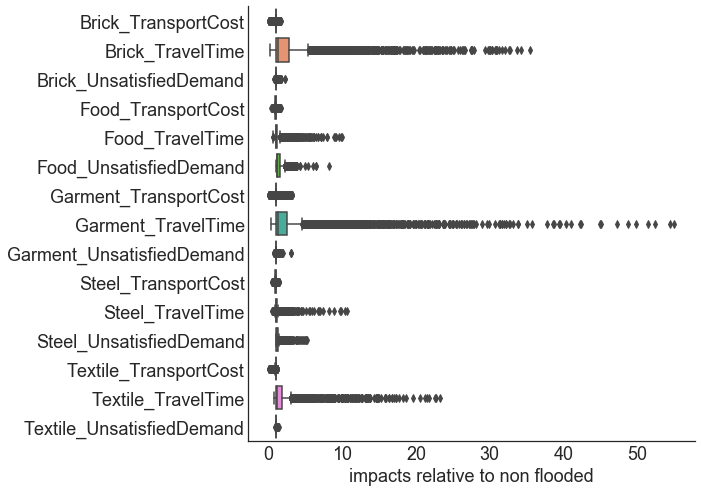

In [131]:
sns.set_style('white')

logical = experiments['policy']=='no intervention'
experiments = experiments[logical]
outcomes = {key:value[logical] for key, value in outcomes.items()}
data = pd.DataFrame.from_dict(outcomes)

fig, ax = plt.subplots()

sns.boxplot(data=data, ax=ax, orient='h')
ax.set_xlabel('impacts relative to non flooded')
sns.despine()

change_fontsize(fig, 18)
save_fig(fig, './results/figs/', 'boxplot_no_intervention')
plt.show()

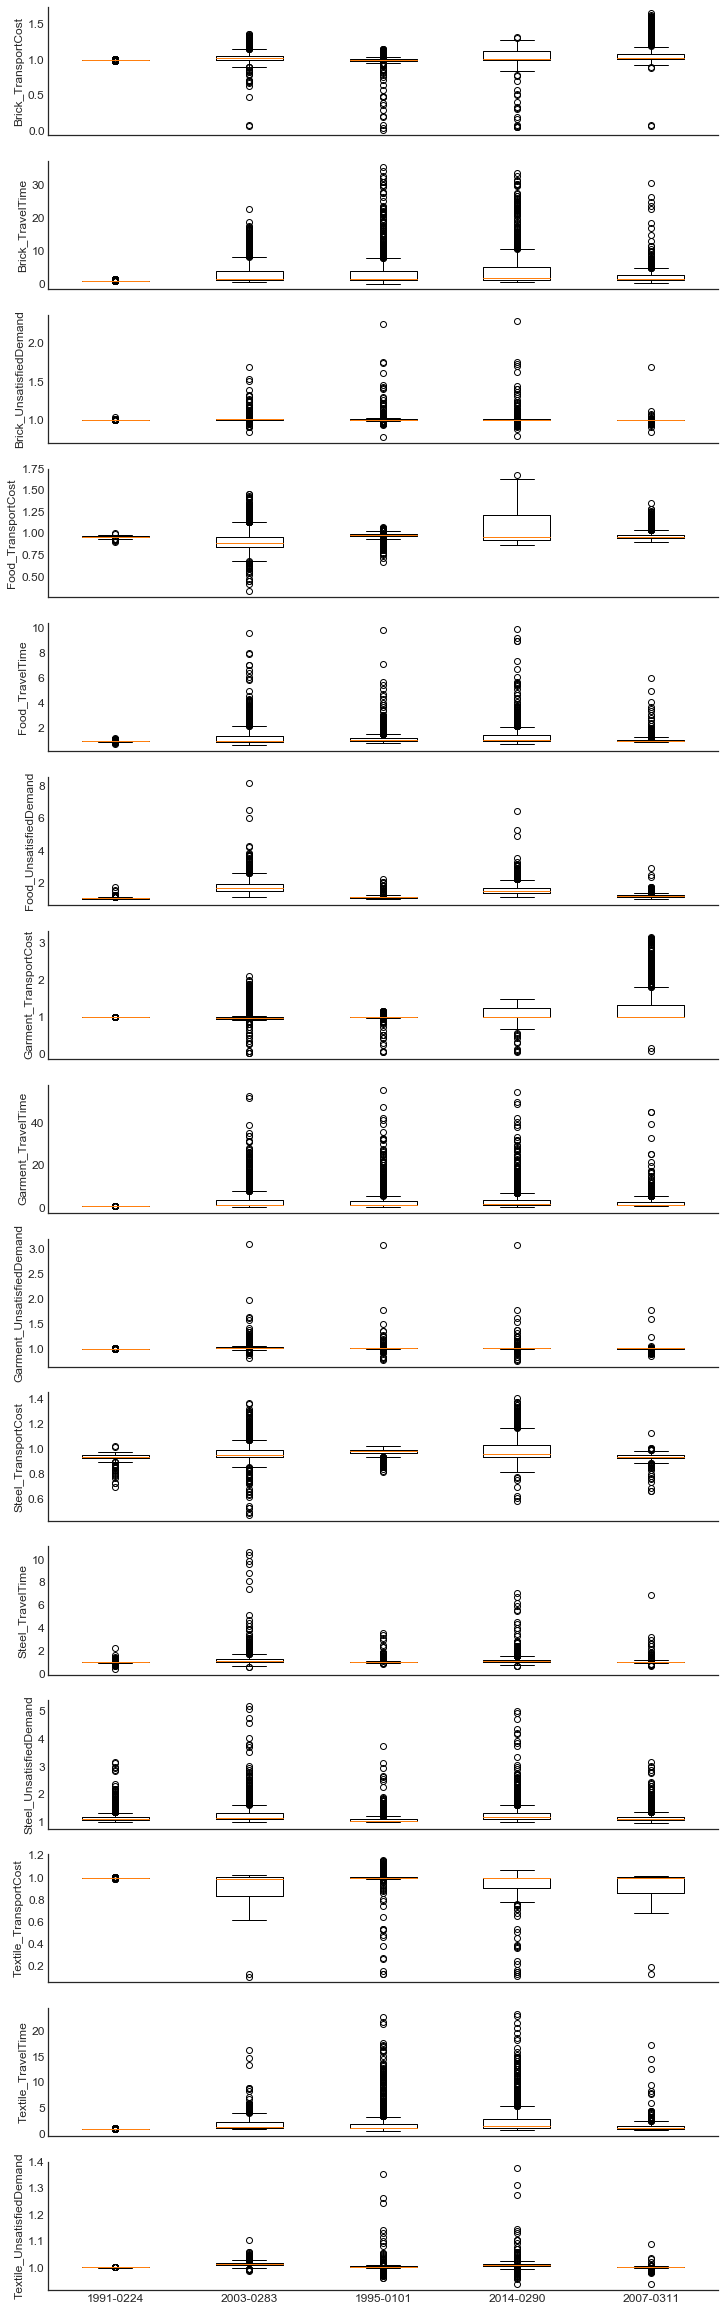

In [14]:
keys = list(outcomes.keys())
keys.sort()

fig, axes = plt.subplots(nrows=len(keys))
fig.set_figheight(42)
for i, key in enumerate(keys):
    value = outcomes[key]
    ax = axes[i]
    
    labels = list(set(experiments['Flood_area']))
    data = []
    for flood_area in labels :
        logical = experiments['Flood_area']==flood_area
        data.append(value[logical])
    
    ax.boxplot(data, labels=labels, vert=True)
    ax.set_ylabel(key)

    if i < len(keys)-1:
        ax.set_xticks([])
    sns.despine()

    change_fontsize(fig, 12)
#     save_fig(fig, './results/figs/', 'boxplot')

plt.show()

In [ ]:
from ema_workbench.analysis.feature_scoring import get_feature_scores_all
remove = ['model', 'scenario_id',  'Intervention_1', 'policy']
filtered_experiments = rcf.drop_fields(experiments, asrecarray=True, 
                                       drop_names=remove)

fs = get_feature_scores_all(filtered_experiments, outcomes)

In [17]:
fs = fs.reindex(['Flood_area', 'Flood_depth', 'Flood_duration',
'Road_cost', 'Trs_cost','Water_cost',
'Damage_bridge_a', 'Damage_bridge_b', 'Damage_bridge_c', 'Damage_bridge_d',
'Damage_ferry', 'Damage_ports', 'Damage_terminals', 
'Damage_railstations', 'Damage_railways',
'Damage_road_n', 'Damage_road_r', 'Damage_road_z', 
'Damage_waterway_1', 'Damage_waterway_2', 'Damage_waterway_3','Damage_waterway_4', 
'Brick_rail', 'Brick_road', 'Brick_water', 
'Food_rail', 'Food_road', 'Food_water', 
'Garment_rail', 'Garment_road', 'Garment_water', 
'Steel_rail', 'Steel_road', 'Steel_water',
'Textile_rail', 'Textile_road', 'Textile_water'])
fs = fs[sorted(fs.columns)]

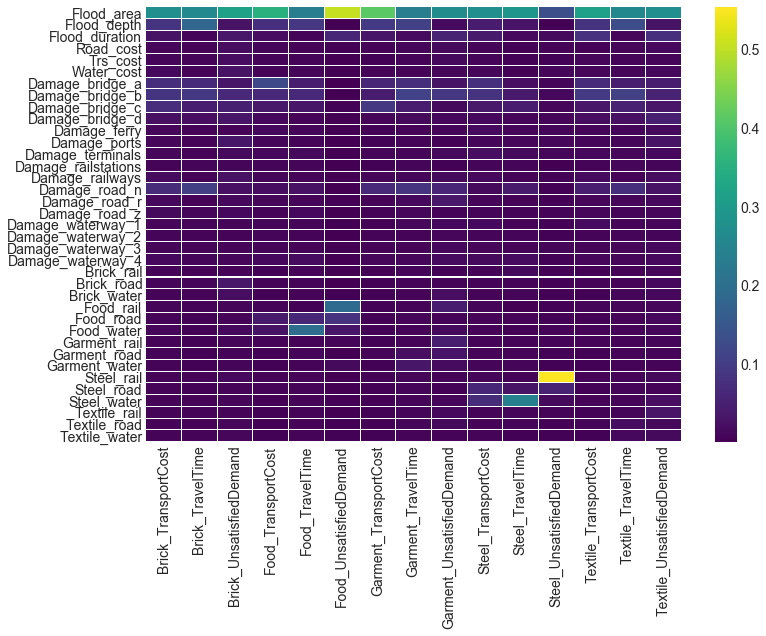

In [18]:
sns.heatmap(fs, cmap='viridis',linewidths=.01)

fig = plt.gcf()
change_fontsize(fig)
save_fig(fig, './results/figs/', '_fs')

plt.show()

I would like to see the correlation of the feature scores by floodmap for each outcome

```python
remove = ['model', 'scenario_id',  'Intervention_1',]
experiments = rcf.drop_fields(experiments, asrecarray=True, 
                                       drop_names=remove)

floodmaps = set(experiments['Flood_area'])
feature_scores = {}
for floodmap in floodmaps:
    logical = experiments['Flood_area']==floodmap
    x = experiments[logical]
    y = {key:value[logical] for key, value in outcomes.items()}
    feature_scores[floodmap] = get_feature_scores_all(x,y).T


feature_scores.keys()
```

## measures

In [19]:
from numpy.lib import recfunctions as rf
import natsort

results = load_results('./results/pff 6 floods 1000 experiments cleaned.tar.gz')
experiments, outcomes = results

In [20]:

mapping = {'Intervention_1': '01 Dhaka Chittagong highway expansion',
           'Intervention_2': '02 R504',
           'Intervention_3': '03 1st Padma bridge',
           'Intervention_4': '04 2nd Padma bridge',
           'Intervention_5': '05 South Asia connectivity project',
           'Intervention_6': '06 Dhaka bypass',
           'Intervention_7': '07 Eastern Bangladesh bridge improvement',
           'Intervention_8': '08 Bangabandhu Bridge on N405',
           'Intervention_9': '09 improving high criticality regional roads',
           'Intervention_10': '10 Waterway capacity increase',
           'Intervention_11': '11 Chittagong port development',
           'Intervention_12': '12 Mongla port development',
            }

for key, value in mapping.items():
    index = np.where(experiments['policy']==key)

    # for some silly reason we cannot vectorize over policy column
    # probably because dtype is object or something similar
    for entry in index:
        experiments['policy'][entry] = value

/Users/jhkwakkel/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


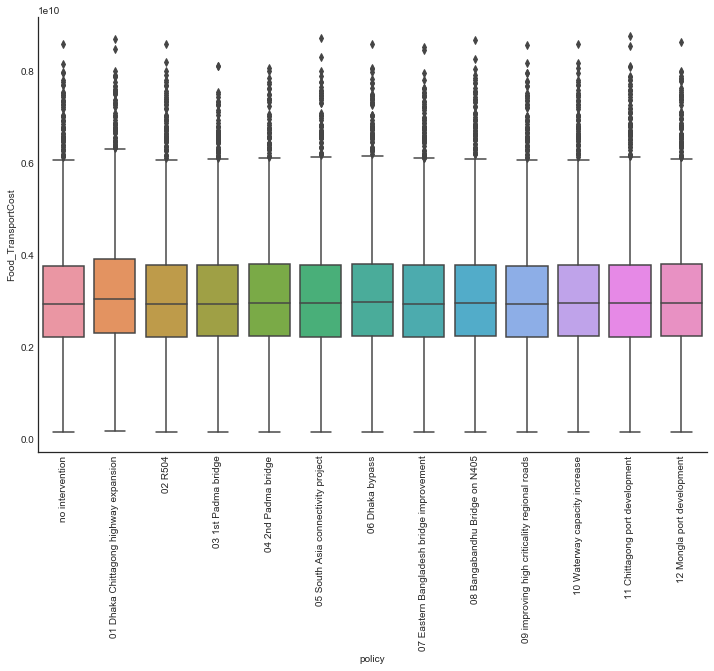

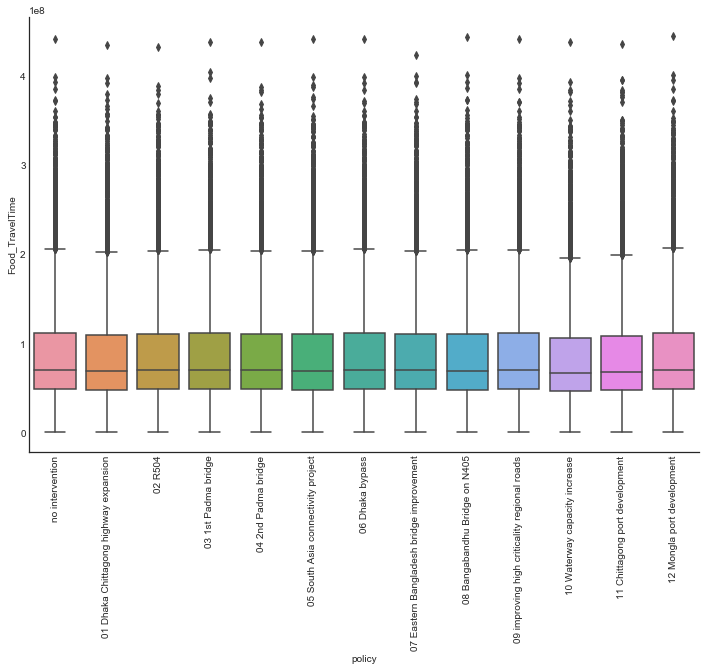

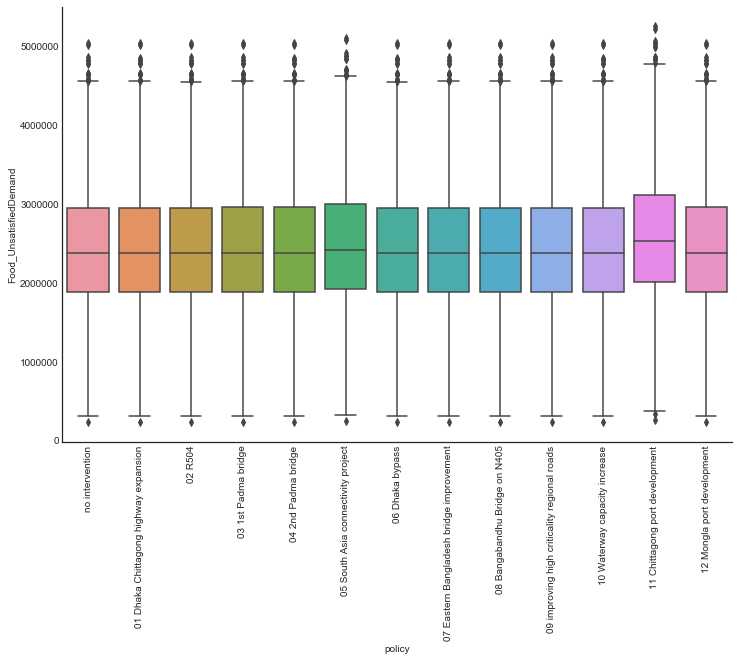

In [21]:
policies = experiments['policy']
order = natsort.natsorted(set(policies))
order.remove('no intervention')
order = ['no intervention',] + order

data = pd.DataFrame.from_dict(dict(policy=policies, 
                                   **outcomes))
oois = sorted(list(outcomes.keys()))
for ooi in oois:
    if not ooi.startswith('Food'):
        continue
    
    figure, ax = plt.subplots()
    ax.set_ylabel(ooi)
    sns.boxplot(data=data, x='policy', y=ooi, ax=ax, order=order)
    plt.xticks(rotation=90)
    sns.despine()
plt.show()

## feature scoring

In [47]:
# experiments, outcomes = load_results('./results/pff 6 floods 1000 experiments cleaned.tar.gz')

x = rf.drop_fields(experiments, asrecarray=True, drop_names=['model'])

fs = get_feature_scores_all(x, outcomes)


In [48]:
fs = fs.reindex(['Flood_area', 'Flood_depth', 'Flood_duration',
'Road_cost', 'Trs_cost','Water_cost',
'Damage_bridge_a', 'Damage_bridge_b', 'Damage_bridge_c', 'Damage_bridge_d',
'Damage_ferry', 'Damage_ports', 'Damage_terminals', 
'Damage_railstations', 'Damage_railways',
'Damage_road_n', 'Damage_road_r', 'Damage_road_z', 
'Damage_waterway_1', 'Damage_waterway_2', 'Damage_waterway_3','Damage_waterway_4', 
'Brick_rail', 'Brick_road', 'Brick_water', 
'Food_rail', 'Food_road', 'Food_water', 
'Garment_rail', 'Garment_road', 'Garment_water', 
'Steel_rail', 'Steel_road', 'Steel_water',
'Textile_rail', 'Textile_road', 'Textile_water'])
fs = fs[sorted(fs.columns)]

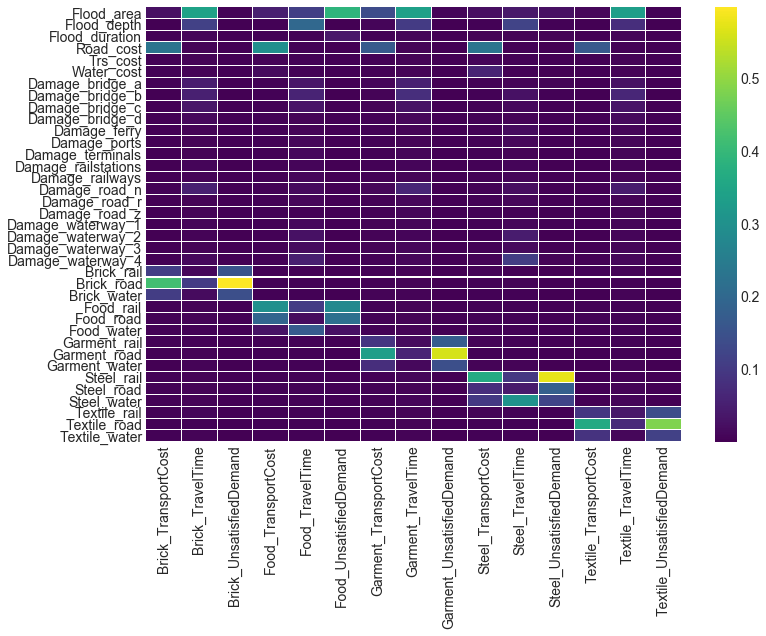

In [49]:

sns.heatmap(fs, cmap='viridis',linewidths=.01)

fig = plt.gcf()
change_fontsize(fig)
save_fig(fig, './results/figs/', '_fs_policies')

plt.show()

## regret based analysis

let's use reference case regret to futher explore the results

In [22]:
# have to rebuild scenario index

index = np.zeros(experiments.shape[0], dtype=np.int)

for i, entry in enumerate(set(experiments['Textile_road'])):
    for j, floodmap in enumerate(set(experiments['Flood_area'])):
        logical = (experiments['Textile_road']==entry) & (experiments['Flood_area']==floodmap)
        index[logical] = i + j*1000

data = pd.DataFrame.from_dict(dict(policy=experiments['policy'], 
                                   scenario_id=index,
                                   **outcomes)).set_index(['scenario_id', 'policy'])
normalization = data.xs(('no intervention'), level=1)
grouped = data.groupby(['policy'])
reference_regret = grouped.apply(lambda x: x-normalization)

### plot regret for each intervention over all outcomes

/Users/jhkwakkel/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


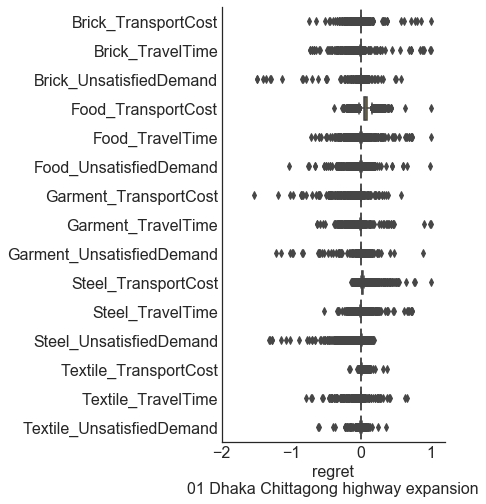

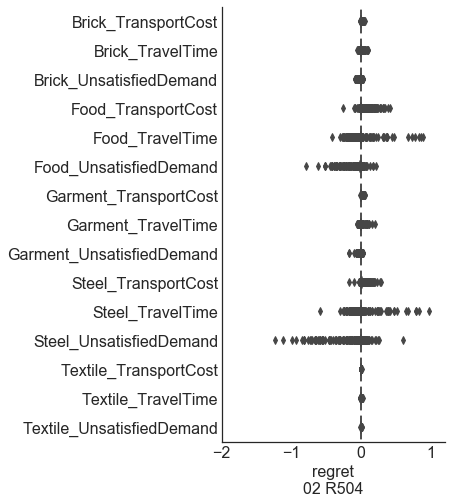

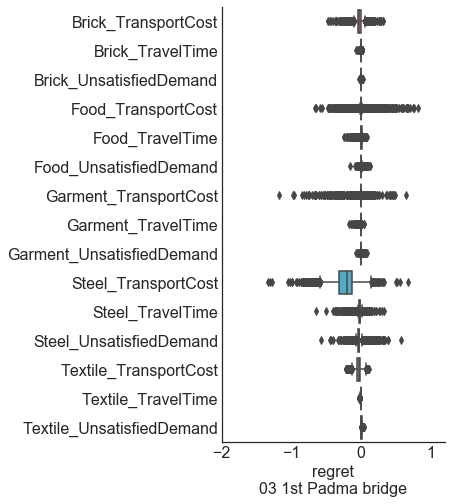

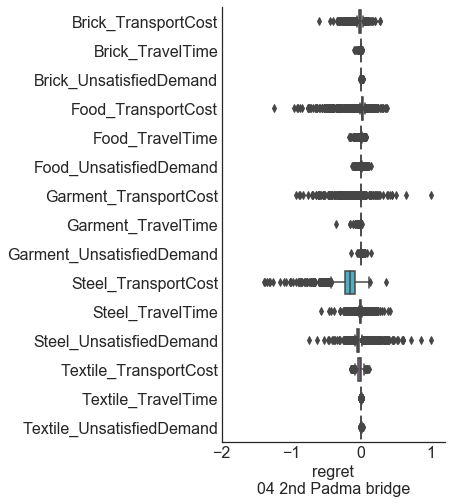

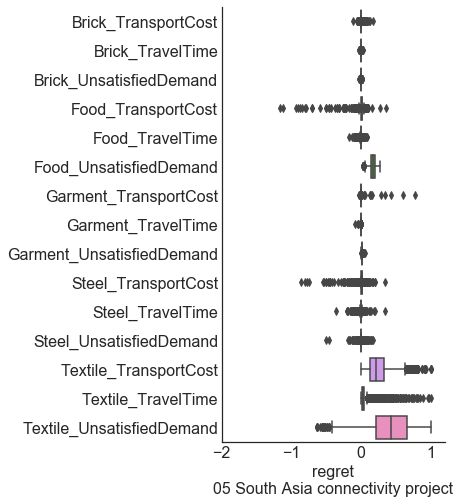

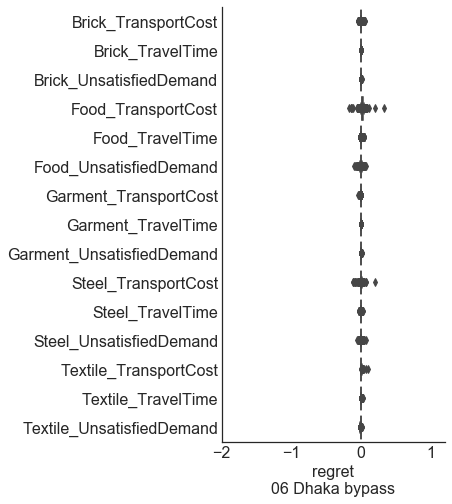

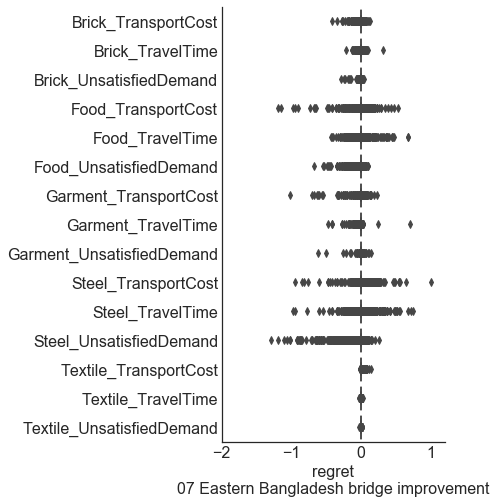

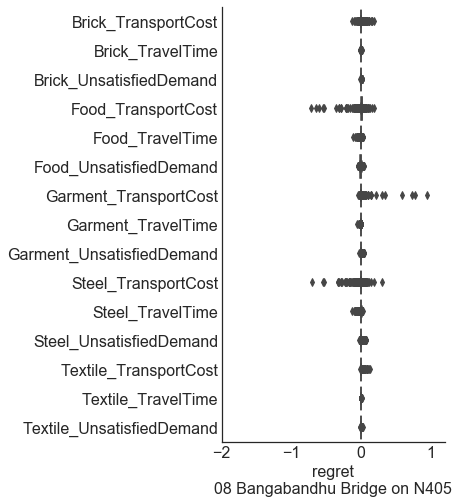

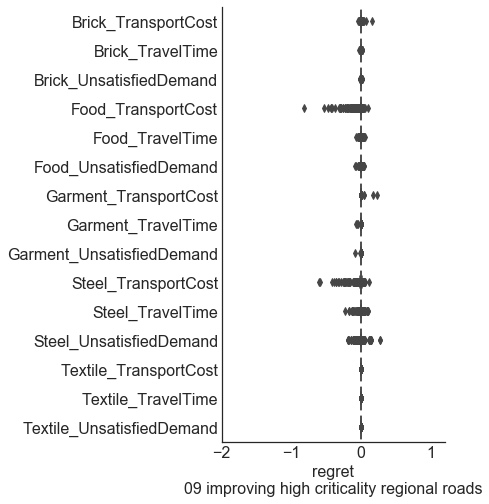

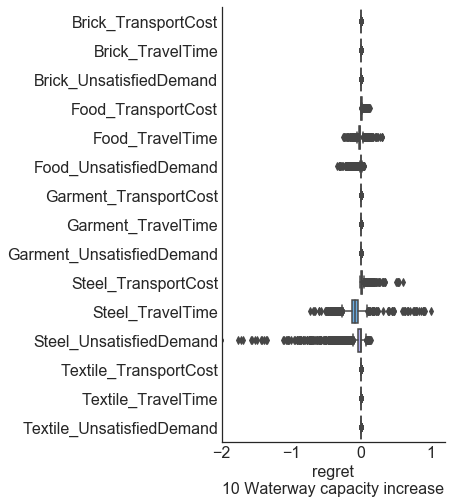

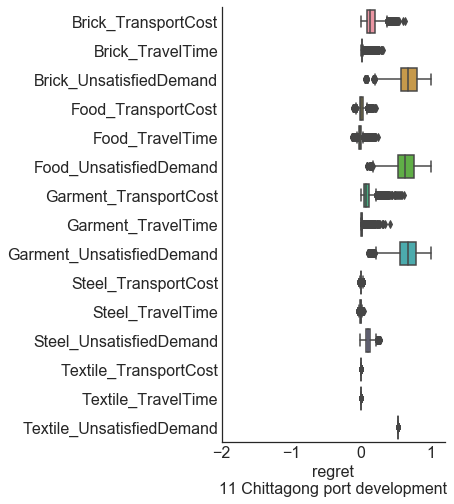

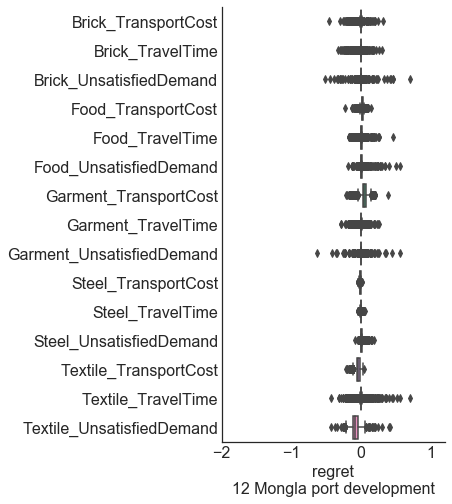

In [113]:
sns.set_style('white')
mpl.rcParams['figure.figsize'] = (4,8)

plotdata = reference_regret.copy()
policies = set(experiments['policy'])
policies.remove('no intervention')
policies = natsort.natsorted(policies)

maxima = plotdata.max()

plotdata = plotdata[sorted(plotdata.columns)]

for policy in policies:
    data = plotdata.xs(policy, level=1)
    fig, ax = plt.subplots()
    data = data/maxima
    sns.boxplot(data=data, ax=ax, orient='h')
    plt.locator_params(axis='x',nbins=5)
    change_fontsize(fig, fs=16)
    sns.despine()

    ax.set_xlim(xmin=-2, xmax=1.2)
    ax.set_xlabel('regret\n{}'.format(policy))
    save_fig(fig, './results/figs/', '_regret_{}'.format(policy))
    plt.show()

### regret by outcome over all interventions

/Users/jhkwakkel/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


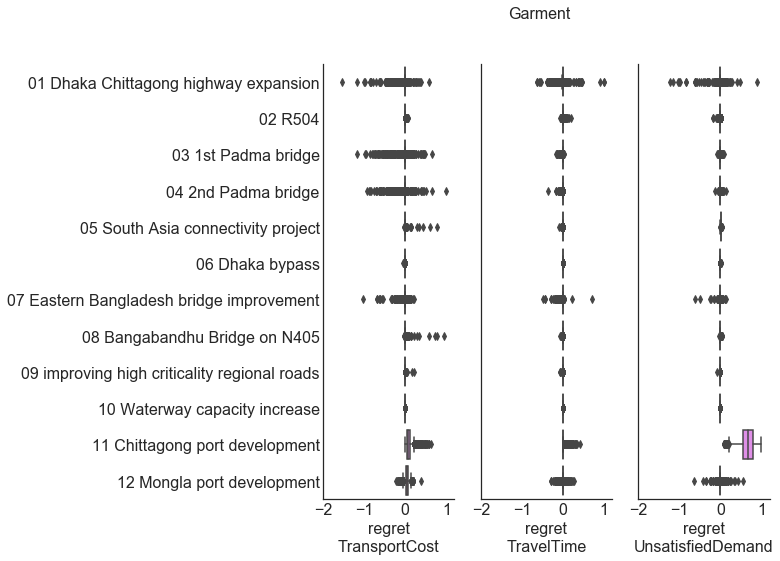

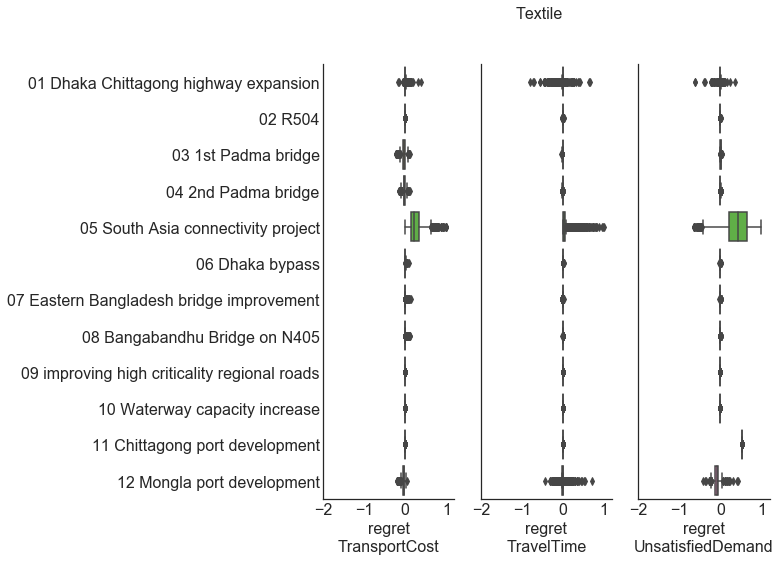

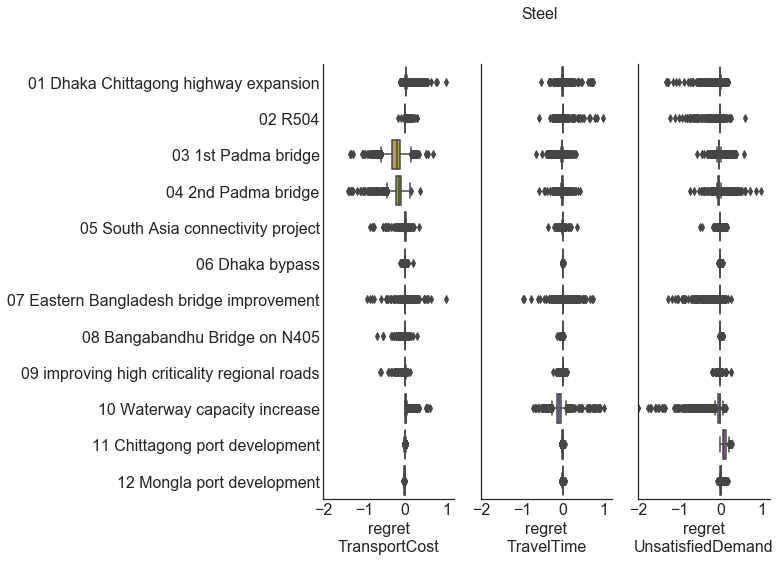

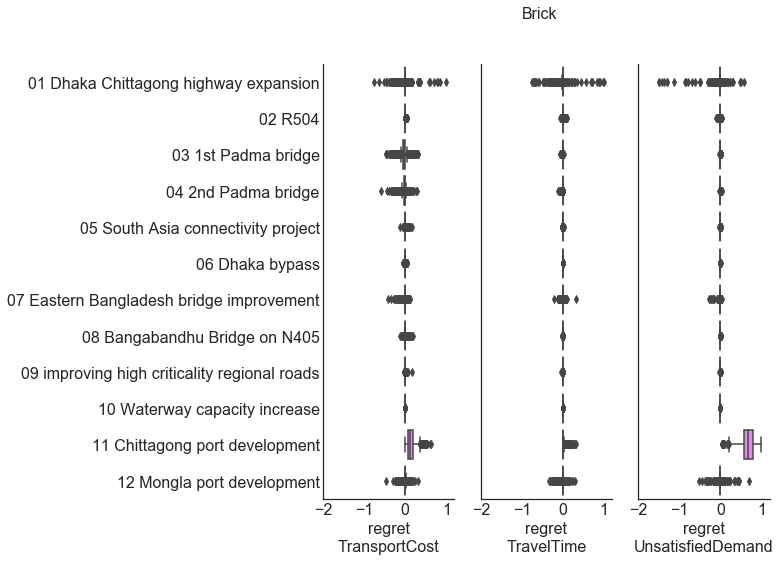

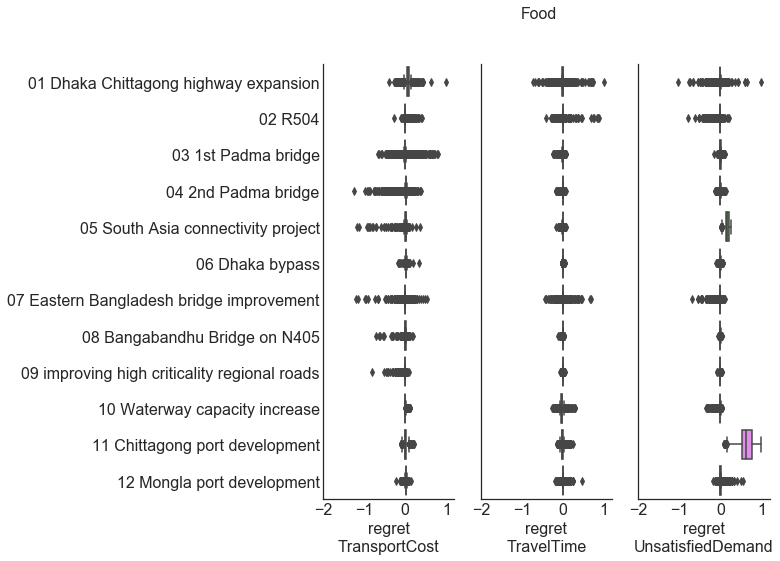

In [115]:
sns.set_style('white')
mpl.rcParams['figure.figsize'] = (8,8)

plotdata = reference_regret.copy()
policies = set(experiments['policy'])
policies.remove('no intervention')
policies = natsort.natsorted(policies)

maxima = plotdata.max()
plotdata = plotdata[sorted(plotdata.columns)]

goodtypes = ['Garment', 'Textile', 'Steel', 'Brick', 'Food']

for goodtype in goodtypes:
    oois = [entry for entry in plotdata.columns if entry.find(goodtype) != -1]
    fig, axes = plt.subplots(ncols=3, gridspec_kw=dict(wspace=0.2))
    
    fig.suptitle(goodtype, fontsize=16)
    
    for i, column in enumerate(natsort.natsorted(oois)):
        data = plotdata[column]
        ax = axes[i]
        
        data = data/maxima[column]
        data = data.reset_index(level=1)
        sns.boxplot(data=data, ax=ax, y='policy', x=column, order=policies,
                   orient='h')
        sns.despine()
        ax.set_xlim(xmin=-2, xmax=1.2)

        plt.locator_params(axis='x',nbins=5)

        label = column.split('_')[1]
        
        ax.set_xlabel('regret\n{}'.format(label))
        ax.set_ylabel('')
        if i>0:
            plt.setp(ax.get_yticklabels(), visible=False)

    change_fontsize(fig, fs=16)
    save_fig(fig, './results/figs/', '_regret_{}'.format(goodtype))
    plt.show()

### regret feature scoring

**TODO**
should be rerun
not sure about the alignment of the regret numbers with the experiment array.
experiment id should be a column in the experiments

In [58]:
regret_dict = {}
for column in reference_regret.columns:
    regret_dict[column] = reference_regret[column].values

In [62]:
from ema_workbench.analysis.feature_scoring import get_feature_scores_all
remove = ['model', 'scenario_id',  'Intervention_1']
x = rcf.drop_fields(experiments, asrecarray=True, 
                                       drop_names=remove)

fs = get_feature_scores_all(x, regret_dict)

In [65]:
fs = fs.reindex(['Flood_area', 'Flood_depth', 'Flood_duration',
'Road_cost', 'Trs_cost','Water_cost',
'Damage_bridge_a', 'Damage_bridge_b', 'Damage_bridge_c', 'Damage_bridge_d',
'Damage_ferry', 'Damage_ports', 'Damage_terminals', 
'Damage_railstations', 'Damage_railways',
'Damage_road_n', 'Damage_road_r', 'Damage_road_z', 
'Damage_waterway_1', 'Damage_waterway_2', 'Damage_waterway_3','Damage_waterway_4', 
'Brick_rail', 'Brick_road', 'Brick_water', 
'Food_rail', 'Food_road', 'Food_water', 
'Garment_rail', 'Garment_road', 'Garment_water', 
'Steel_rail', 'Steel_road', 'Steel_water',
'Textile_rail', 'Textile_road', 'Textile_water', 'policy'])
fs = fs[sorted(fs.columns)]

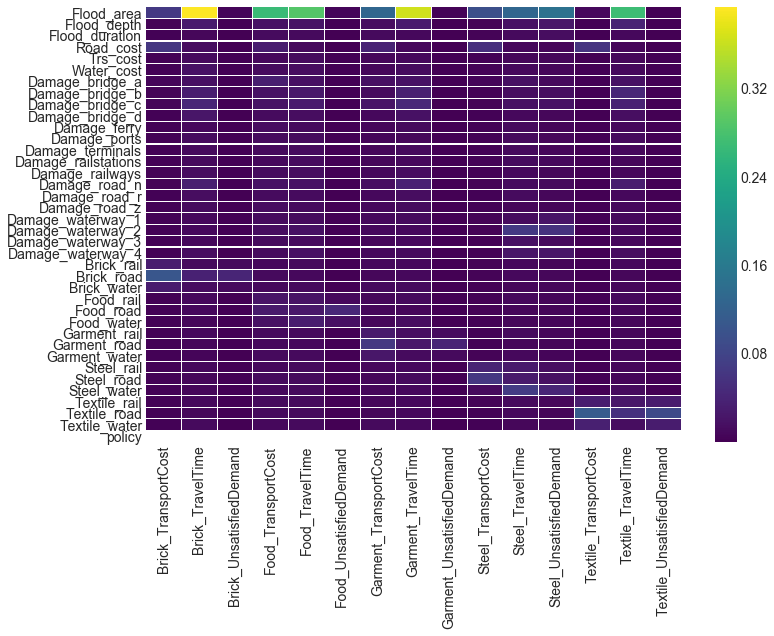

In [66]:
sns.heatmap(fs, cmap='viridis',linewidths=.01)

fig = plt.gcf()
change_fontsize(fig)
save_fig(fig, './results/figs/', '_fs')

plt.show()

## scenario discovery

using normalized data compared to non intervention non flooded, focused on food unsatisfied demand

In [154]:
experiments, outcomes = load_results('./results/pff 6 floods 1000 experiments cleaned.tar.gz')

[MainProcess/INFO] results loaded succesfully from /Users/jhkwakkel/Documents/bangladesh_roadtransport/simulation_model/results/pff 6 floods 1000 experiments cleaned.tar.gz


In [157]:
logical = experiments['Flood_area']=='NON_FLOODED'
outcomes_non_flooded = {k:v[logical] for k,v in outcomes.items()}

delta_outcomes = outcomes.copy()
delta_outcomes = {k:v[logical==False] for k,v in outcomes.items()}
delta_experiments = experiments[logical==False]

for entry in set(delta_experiments['Flood_area']):
    logical = delta_experiments['Flood_area']==entry
    
    for key in delta_outcomes.keys():
        delta_outcomes[key][logical] /= outcomes_non_flooded[key]

x = delta_experiments
y = delta_outcomes

In [182]:
outcomes.keys()

dict_keys(['Textile_TransportCost', 'Brick_TransportCost', 'Garment_UnsatisfiedDemand', 'Food_TravelTime', 'Steel_TransportCost', 'Brick_TravelTime', 'Textile_UnsatisfiedDemand', 'Textile_TravelTime', 'Food_UnsatisfiedDemand', 'Steel_TravelTime', 'Steel_UnsatisfiedDemand', 'Brick_UnsatisfiedDemand', 'Garment_TransportCost', 'Garment_TravelTime', 'Food_TransportCost'])

(array([   395.,   3741.,  10712.,  18179.,  18601.,  13437.,   8581.,
          3353.,    900.,    101.]),
 array([  236655.80736418,   738272.51005193,  1239889.21273968,
         1741505.91542743,  2243122.61811519,  2744739.32080294,
         3246356.02349069,  3747972.72617844,  4249589.42886619,
         4751206.13155394,  5252822.83424169]),
 <a list of 10 Patch objects>)

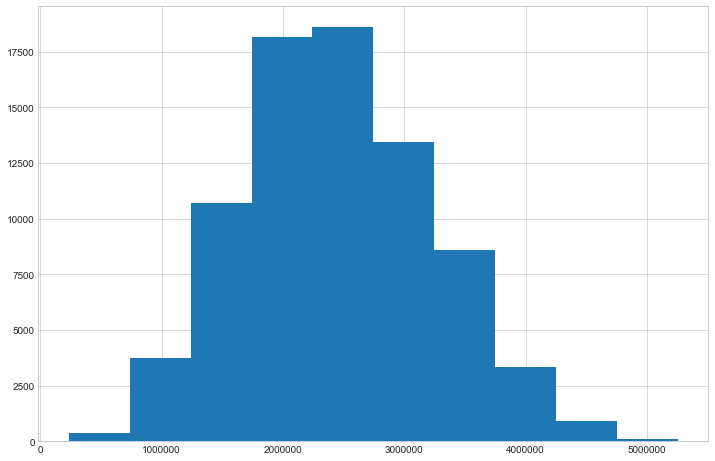

In [184]:
fig, ax = plt.subplots()
ax.hist(outcomes['Food_UnsatisfiedDemand'])

In [197]:
from ema_workbench import ema_logging
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

x = rf.drop_fields(experiments, asrecarray=True,
                   drop_names=['model', 'policy'])
y = outcomes["Food_UnsatisfiedDemand"]>3000000

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.6, peel_alpha=0.1)
box1 = prim_obj.find_box()

[MainProcess/INFO] 78000 points remaining, containing 18712 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05433333333333333, coverage: 0.2264856776400171, density: 1.0 restricted_dimensions: 4


In [198]:
toggle_notebook()

<IPython.core.display.Javascript object>


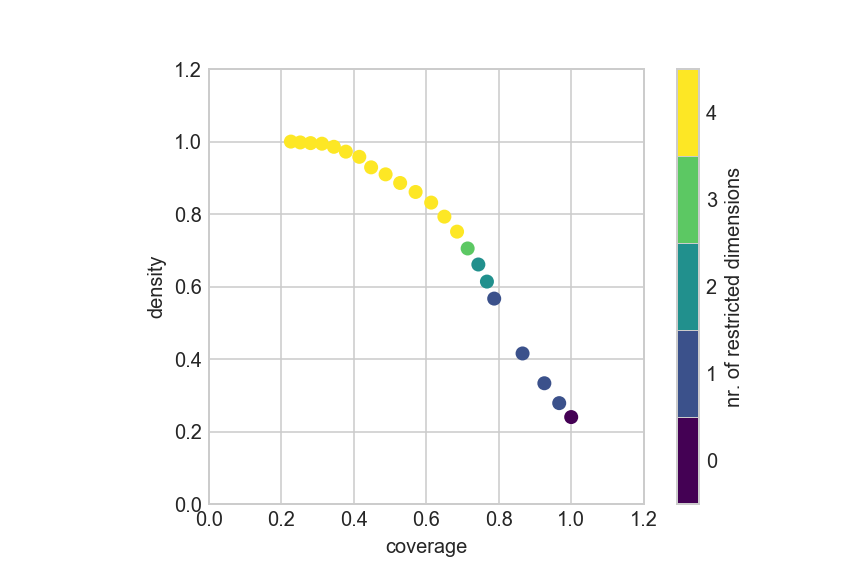

In [199]:
%matplotlib notebook
box1.show_tradeoff()
plt.show()

In [200]:
toggle_inline()

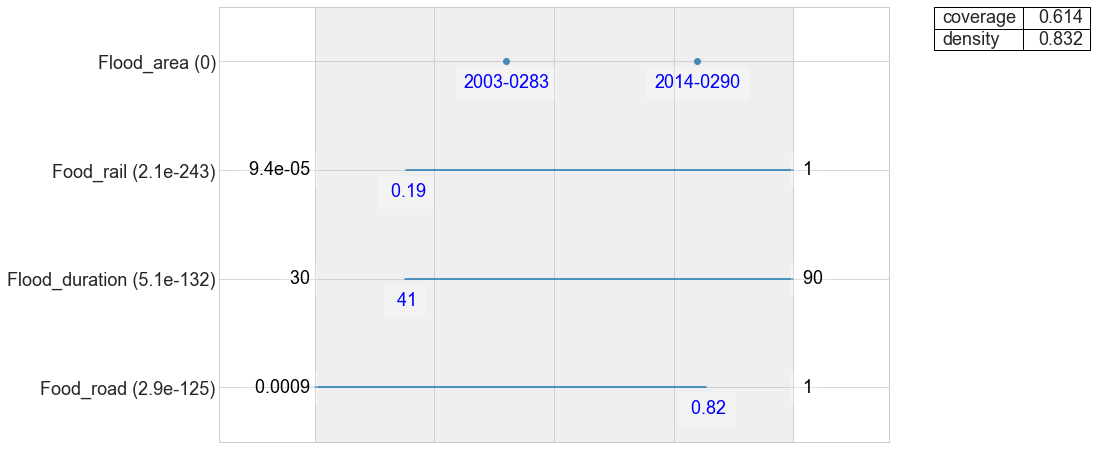

In [201]:
box1.inspect(10, style='graph')
change_fontsize(plt.gcf(), fs=18)
save_fig(plt.gcf(), './results/figs/', '_box10')
plt.show()

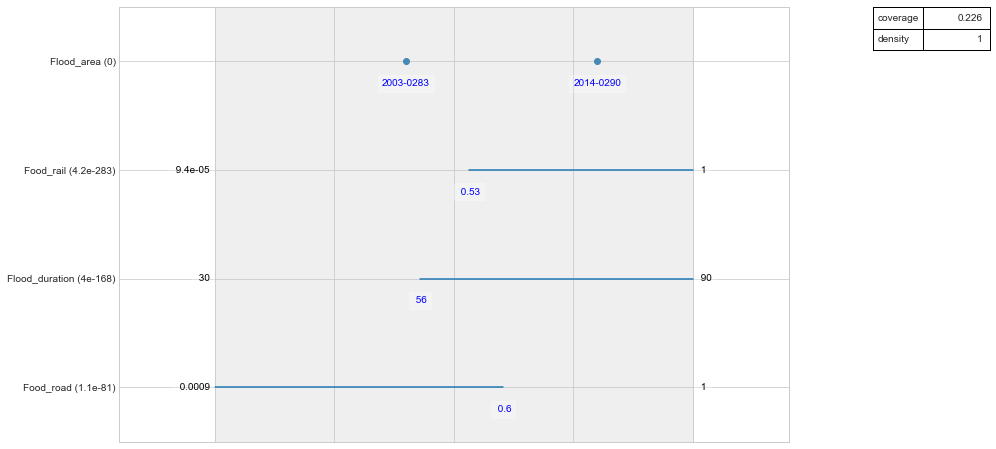

In [194]:
box1.inspect(style='graph')
# change_fontsize(plt.gcf(), fs=18)
# save_fig(plt.gcf(), './results/figs/', '_box10')
plt.show()

In [202]:
box1.select(10)

In [203]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 78000 points remaining, containing 7230 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3974358974358974, returning dump box
